# MNIST Digit Classification with Data Shuffling

In [1]:
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np


In [2]:

# Load the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data() 

train_images, test_images = train_images / 255.0, test_images / 255.0

# Shuffle the training data
shuffled_indices = np.random.permutation(len(train_images))
train_images, train_labels = train_images[shuffled_indices], train_labels[shuffled_indices]


In [3]:

# Define the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Metal device set to: Apple M1 Max

systemMemory: 64.00 GB
maxCacheSize: 24.00 GB

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                        

In [4]:

# Train the model
history = model.fit(train_images, train_labels, epochs=5, validation_data=(test_images, test_labels))


Epoch 1/5
1875/1875 [==============================] - 20s 9ms/step - loss: 0.1433 - accuracy: 0.9558 - val_loss: 0.0463 - val_accuracy: 0.9844
Epoch 2/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0472 - accuracy: 0.9855 - val_loss: 0.0369 - val_accuracy: 0.9873
Epoch 3/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0325 - accuracy: 0.9895 - val_loss: 0.0292 - val_accuracy: 0.9901
Epoch 4/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0245 - accuracy: 0.9922 - val_loss: 0.0291 - val_accuracy: 0.9897
Epoch 5/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0182 - accuracy: 0.9943 - val_loss: 0.0284 - val_accuracy: 0.9909


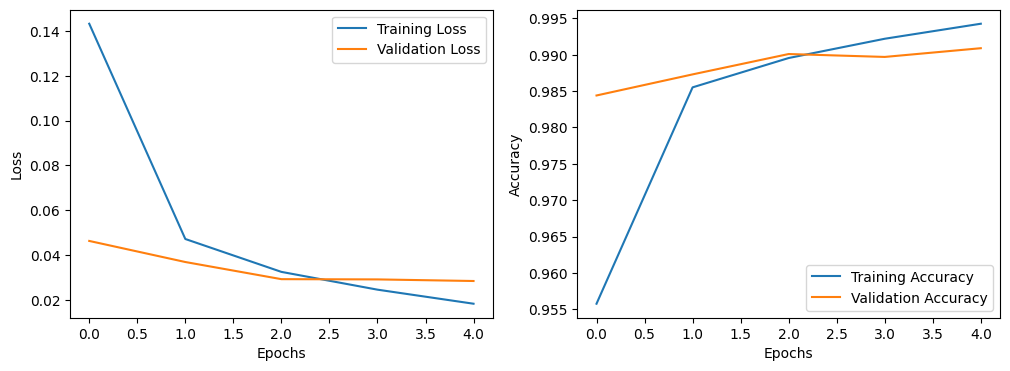

In [5]:

# Generate and display training curves
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()
